# Ultimate Take-Home Challenge

In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

# import the garbage collection
import gc

# Setup Seaborn
#sns.set_style("whitegrid")
#sns.set_context("poster")

#Set maximum number of rows,columns to be shown. Maximum column width made to 500.
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.notebook_repr_html', True)

# Set matplotlib figure size
plt.rcParams['figure.figsize'] = (18, 8)

# Part 1: Exploratory Data Analysis

In [2]:
with open('logins.json') as f:
    data = json.load(f)
logins = pd.DataFrame(data)

In [3]:
#Preview data in Dataframe
print(logins.info())
print(logins.shape)
print(logins.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB
None
(93142, 1)
            login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21


For east of datetime manipulation, we will complete folloiwng data wrangling steps <br>
1. Convert the login_time to a datetime object <br>
2. Change the login_time field to an index <br>
3. Include an additional count field which will help in aggregation <br>

In [4]:
logins['login_time']=pd.to_datetime(logins['login_time'])
logins.set_index('login_time', inplace=True)
logins['count'] = 1
print(logins.info())
print(logins.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB
None
                     count
login_time                
1970-01-01 20:13:18      1
1970-01-01 20:16:10      1
1970-01-01 20:16:37      1
1970-01-01 20:16:36      1
1970-01-01 20:26:21      1


In [5]:
# Function to resample a dataframe
def resample(df, interval):
    """
    Input: Dataframe and Time Interval for resampling
    Returns Resampled dataframe
    """
    # resample the dataframe 
    return df.resample(interval).count()

In [6]:
# We upsampled the dataset to 15 minutes, 60 minutes, daily and monthly 
min15 = resample(logins, '15Min')
hourly = resample(logins, '60Min')
daily = resample(logins, 'D')
monthly = resample(logins, 'M')

In [61]:
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (18, 8)
datefmt = DateFormatter("%m-%d")


In [48]:
# Plot Function
def resample_plot(df,title,ylabel,date_format):
    fig, ax = plt.subplots(figsize = (18,8))
    ax.plot(df['count'])
    ax.set(title=title, ylabel=ylabel)
    ax.xaxis.set_major_formatter(date_format)

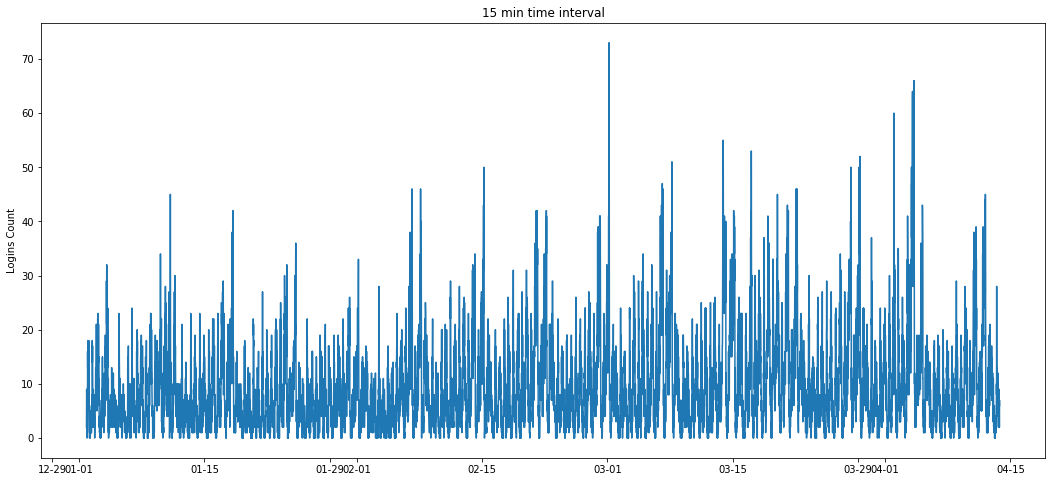

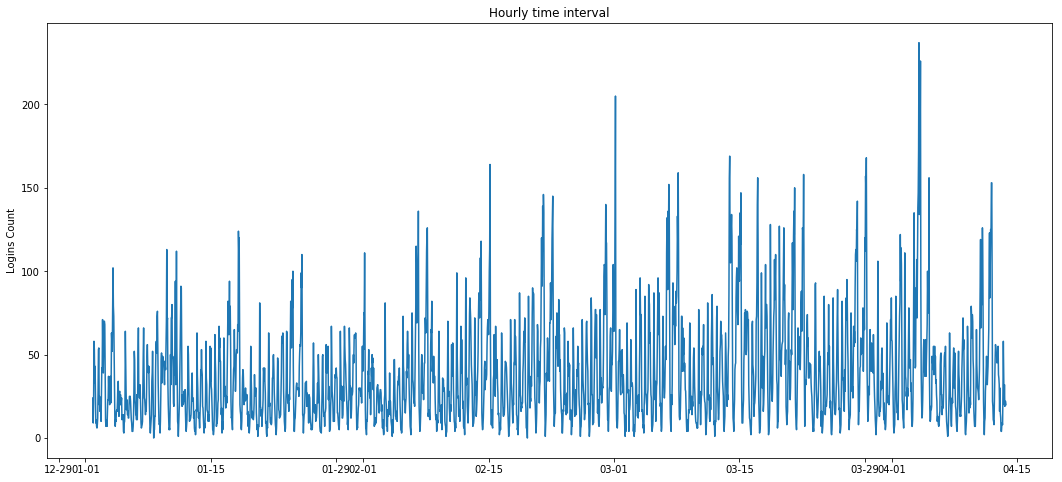

In [49]:
# First, lets visualize the login timestamps based on 4 resampled durations.
resample_plot(min15,"15 min time interval", "Logins Count", datefmt)
resample_plot(hourly, "Hourly time interval", "Logins Count", datefmt)

<b>Analysis</b> <br>
From the analysis on 15 minutes and hourly sampled data, it is very clear that the demand peaks and drops in a similar patterns. <br>
In following plots, we will find out these patterns. <br>

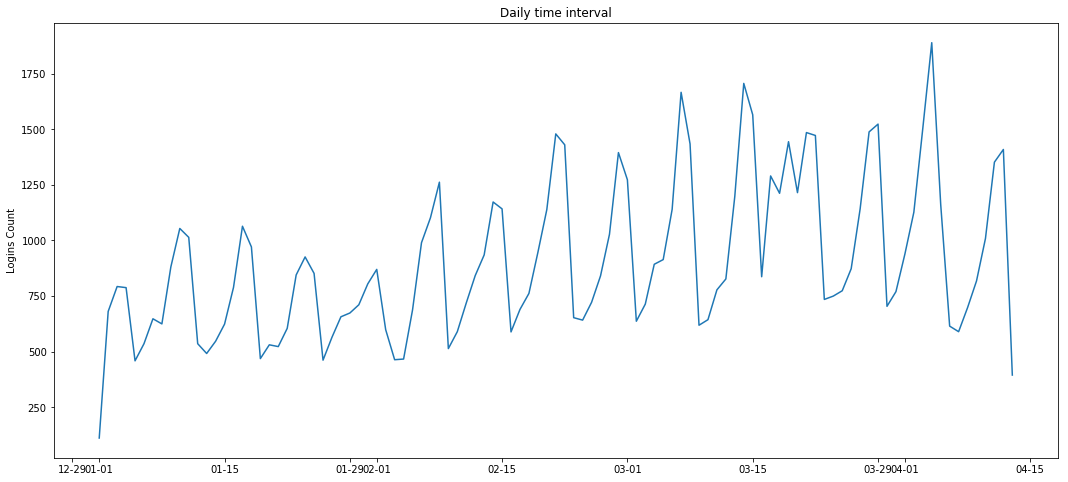

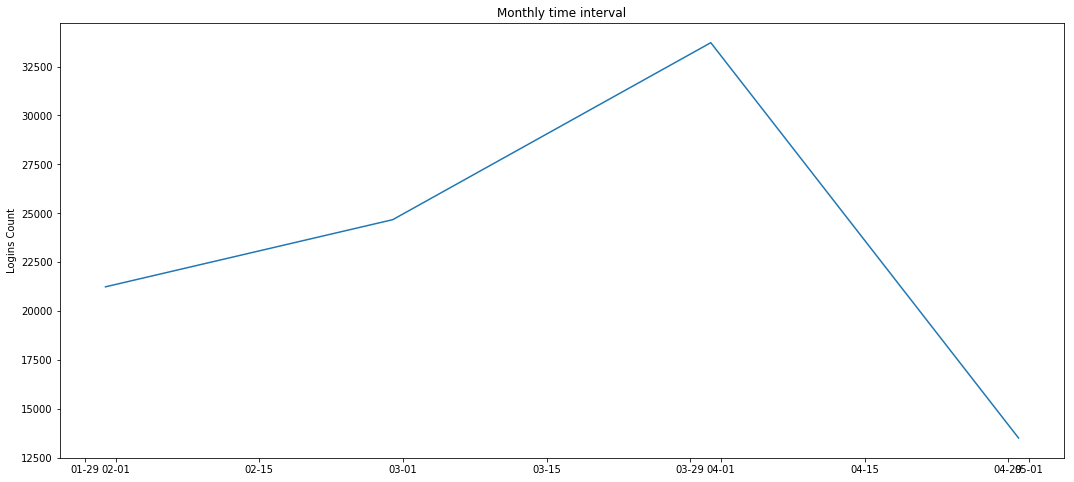

In [50]:
# Now, Lets plot the daily and monthly resampled logins
resample_plot(daily, "Daily time interval", "Logins Count", datefmt)
resample_plot(monthly, "Monthly time interval", "Logins Count", datefmt)

<b>Analysis</b> <br>
From the daily plots, it is evident that the usage peaks and drops on a daily basis. <br>
From the monthly plot, it can be seen that April was the busiest month.  <br>
Lets look at one month and one week demand to check the demand at a granular level <br>

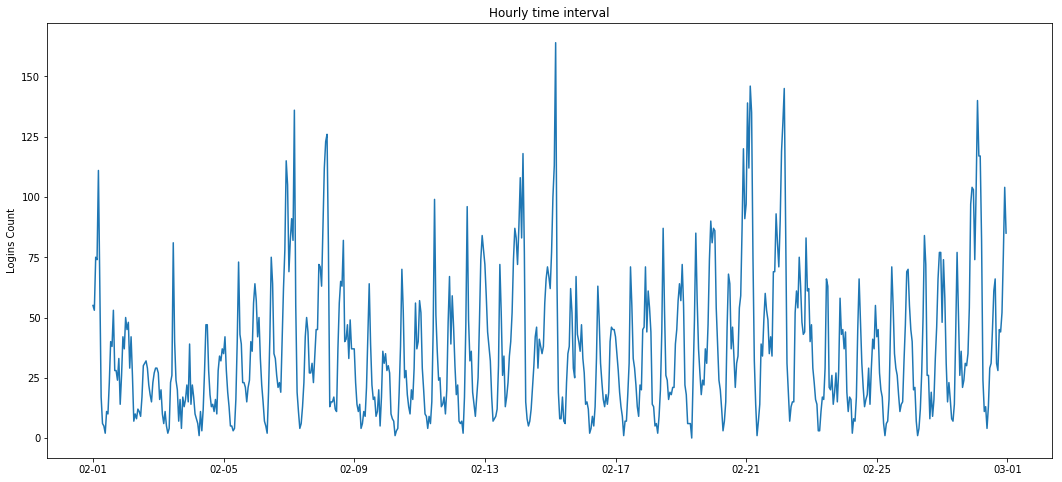

In [51]:
# Plotting a month
resample_plot(hourly.loc['1970-02'], "Hourly time interval", "Logins Count", datefmt)

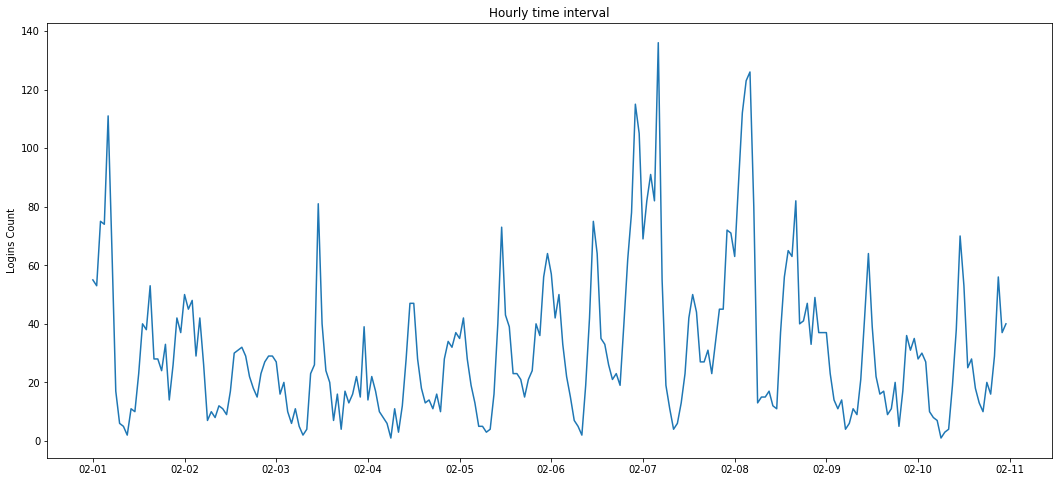

In [52]:
# Plotting 10 days to see weekly trend
resample_plot(hourly.loc['1970-02-01':'1970-02-10'], "Hourly time interval", "Logins Count", datefmt)

From the above plots, it is evident that the demand was high on 2/1, 2/7 and 2/8. Lets check what days they were. 

In [59]:
from dateutil import parser
parser.parse('February 1, 1970').strftime("%A")

'Sunday'

In [ ]:
Hence, it is evident that the demand increases during weekend. <br>
Next, we check a weekend to find how the demand increases. <br>

In [64]:
hourfmt = DateFormatter("%H:%M %m-%d")

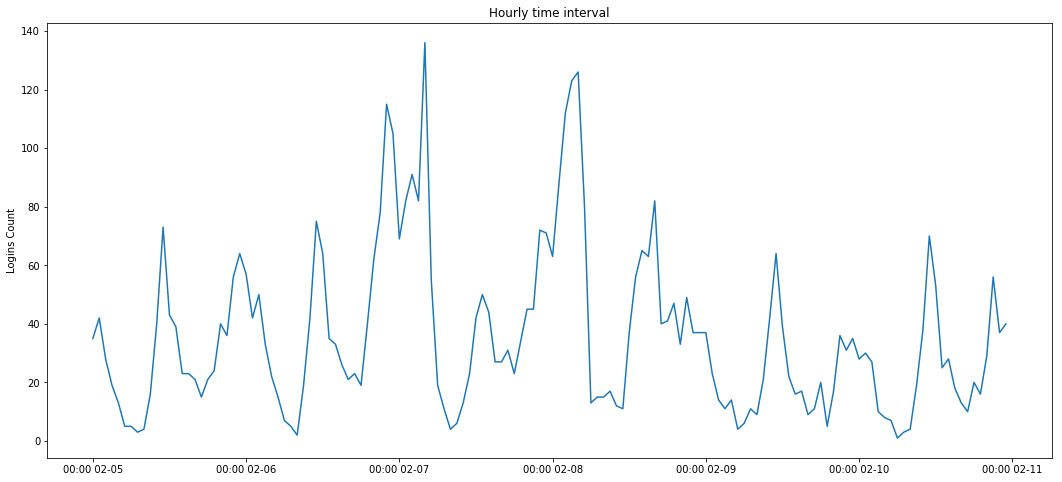

In [67]:
resample_plot(hourly.loc['1970-02-05':'1970-02-10'], "Hourly time interval", "Logins Count", hourfmt)

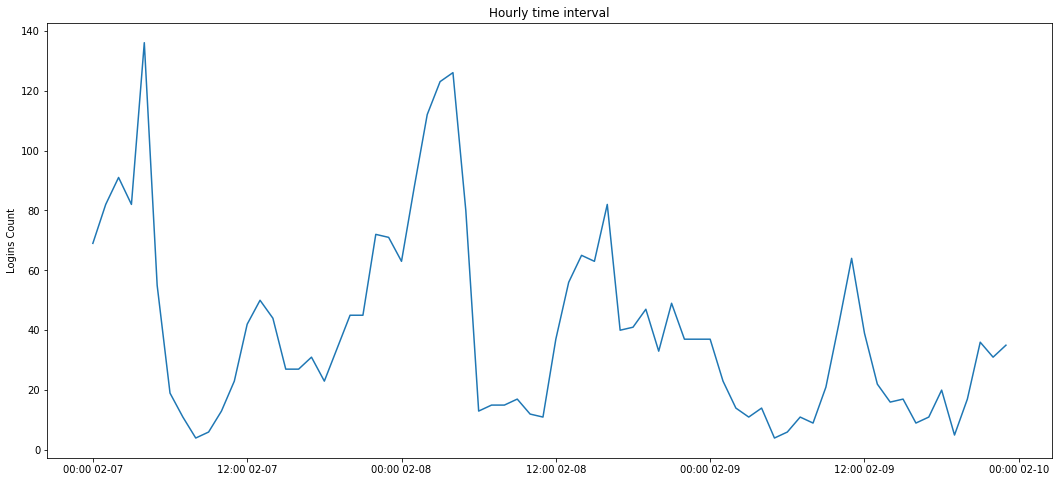

In [68]:
resample_plot(hourly.loc['1970-02-07':'1970-02-09'], "Hourly time interval", "Logins Count", hourfmt)

Its evident that the demand peaks during the midnight of weekends. The demand at noon time is also reasonably high.

<b> Final Insights </b> <br>
So, here are the final insights from the login traffic <br>
(1) The weekend demand is higher than the weekday demand. <br>
(2) Demand during midnight and noon are higher than the demand during other time durations. <br>

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Response

From the scenario, it is evident that Ultimate is a cab company that partners with Drivers. It is profitable for the 
drivers as wells as Ultimate if the drivers are available to leverage the unmet demand in both the cities. There is a toll 
when vehicles cross from one city to the other, which deters drivers to pick rides from both the cities. In the current 
scenario, the drivers pay the toll, hence they tend to pick rides mostly within their respective cities. Ultimate is 
proposing an experiment to reimburse the toll for the drivers so that they can free move between cities to meet the 
unmet demand.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

As we are interested to evaluate whether the reimbursing of tolls is helping the drivers pick up rides in both the cities, 
I will choose the following metric to evaluate success <br>
<b>Metric</b>: Difference in the number of rides taken in non-home city. <br>
This metric will tell me whether the drivers are picking more rides from the other city and whether the ride difference 
between the current scenario and experiment scenario is significantly different. <br>

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Lets say the experiment will be run for 30 days. 

I will choose two samples from the drivers so that there is equal representation from both the cities. May be, each sample
can have 50 drivers chosen at random from both the cities. We will reimburse their tolls for the drivers in the control group
however, we will not reimburse the toll for the non-control group. <br>

Null Hypothesis: The mean of the number of rides taken in non-home city is equal between the control and non-control group.<br>
Alternate Nypothesis: The mean of the number of rides taken in non-home city in control group is higher than the corresponding 
    metric in non-control group.<br>

After the experiment is over, I will run two sample z-test to evaluate whether the means of the two sample are statistically 
different. If yes, it would be concluded that the reimbursed toll did encourage drivers to take rides in other cities. As our 
sample size is 100, we can use z-test to draw the conclusion. <br>

I would also recommend the company to run these tests on weekdays and weekends separately. For example, if there is 
no significant in crease in number of rides on weekend even after reimbursing tolls, it may be best for the company to 
reimburse tolls only for weekday rides. Thus, Ultimate can also save the costs from reimbursed tolls on weekend.

# Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

## 1. Data Ingestion

In [2]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
ultimate_data = pd.DataFrame(data)

## 2. EDA and Data Wrangling

In [3]:
#Preview the dataset
ultimate_data.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [4]:
display(ultimate_data.info())
display(ultimate_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


None

(50000, 12)

There are 50000 rows with 12 columns. Form the sample data it is evident that the dataset has both numeric and categorical 
variables. Lets check the statistical properties of numeric columns.

In [5]:
ultimate_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


<b>Retained Rider</b>: At least one ride in last 30 days

In [6]:
# Change the datatype of two date fields so that the data manipulation would be easier
ultimate_data.last_trip_date = pd.to_datetime(ultimate_data.last_trip_date)
ultimate_data.signup_date = pd.to_datetime(ultimate_data.signup_date)
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
# Next, we try to find the date range of last rides.
ultimate_data.last_trip_date.describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

As the last date is July 1st 2014, drivers are retained in case they took a ride in June. We will create a variable rider_retained and add it based on above condition. The rider_retained variable will be used as the class variable in model building.

In [8]:
ultimate_data['rider_retained'] = (ultimate_data['last_trip_date'] >= '2014-06-01')*1

## Q1: What fraction of observed users were retained


In [9]:
print ('Total Riders: ', len(ultimate_data))
print ('Total Retained Riders: ', ultimate_data['rider_retained'].sum())
print ('Total % of Retained Riders: ', ultimate_data['rider_retained'].sum()/ len(ultimate_data))

Total Riders:  50000
Total Retained Riders:  18804
Total % of Retained Riders:  0.37608


So, around 37.6% of the riders were retained.

Next, We find the columns that need to be wrangled. Especially, we will run one hot vectorization for categorical variables.

In [15]:
ultimate_data.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [16]:
cities_ohe = pd.get_dummies(ultimate_data['city'])
ultimate_data = ultimate_data.join(cities_ohe)

In [17]:
# Next we check the phone field
ultimate_data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [18]:
# As there are man null values, we will replace the nulls by 'Other'
ultimate_data.phone.fillna('Other', inplace=True)
ultimate_data.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [19]:
phones_ohe = pd.get_dummies(ultimate_data['phone'])
ultimate_data = ultimate_data.join(phones_ohe)

In [20]:
# After one hot encoding, we drop the original fields
ultimate_data.drop(['city', 'phone'], axis=1, inplace=True)

In [25]:
# We will convert the last trip date to a numeric field that demonstrates the day difference.
ultimate_data['last_trip_date'] = (ultimate_data['last_trip_date'] - min(ultimate_data['last_trip_date'])).dt.days + 1 

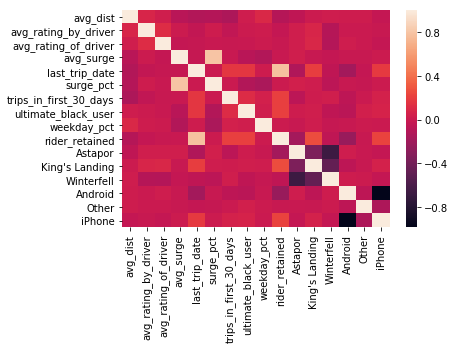

In [26]:
corr = ultimate_data.corr()
ax = sns.heatmap(corr)
plt.show()

In [27]:
corr['rider_retained'].sort_values(ascending=False)

rider_retained            1.000000
last_trip_date            0.780837
King's Landing            0.262284
iPhone                    0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
Other                    -0.007419
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
Winterfell               -0.046611
avg_dist                 -0.092780
Astapor                  -0.174655
Android                  -0.225464
Name: rider_retained, dtype: float64

Looks like the following variables have the most correlation with the rider_retained variable <br>
<b>Positive Correlation</b> <br>
-------------------- <br>
Last Trip Date <br>
City: King's Landing <br>
Phone: iPhone <br>
trips_in_first_30_days <br>
ultimate_black_user <br>

Similarly, the folloiwng variables will have <b> Negative correlation </b> <br>

Phone: Android <br>
City: Astapor  <br>

<br> We will further check our hypothesis in the models

# Question 2
Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

I will build two models based on Logistic Regression and Random Forest for the data challenge. 

I chose Random Forest because its an ensembles algorithm, explainable and good at showing feature importance. 
The challenges in a Random Forest are related to finding the best hyper-parameters. Similarly, logistic regression 
models are fast to train and do a good job in showing the feature importance. On the downside, they may overfit easily.


In [36]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
ultimate_data = pd.DataFrame(data)

In [37]:
# Following the data wrangling steps

ultimate_data.last_trip_date = pd.to_datetime(ultimate_data.last_trip_date)
ultimate_data.signup_date = pd.to_datetime(ultimate_data.signup_date)

In [38]:
ultimate_data['rider_retained'] = (ultimate_data['last_trip_date'] >= '2014-06-01')*1
cities_ohe = pd.get_dummies(ultimate_data['city'])
ultimate_data = ultimate_data.join(cities_ohe)
ultimate_data.phone.fillna('Other', inplace=True)
phones_ohe = pd.get_dummies(ultimate_data['phone'])
ultimate_data = ultimate_data.join(phones_ohe)
ultimate_data.drop(['city', 'phone'], axis=1, inplace=True)
ultimate_data['last_trip_date'] = (ultimate_data['last_trip_date'] - min(ultimate_data['last_trip_date'])).dt.days + 1 

## Prepare for modeling

First, We divide the data into training and test test on 70/30 ratio.

In [99]:
# Import all modeling packages

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler

In [101]:
y = ultimate_data['rider_retained']
X = ultimate_data.drop(['rider_retained', 'last_trip_date'], axis=1)
X = X.drop(['avg_rating_by_driver', 'avg_rating_of_driver'], axis=1)

# Preview the data structure 

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
Astapor                   50000 non-null uint8
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
Android                   50000 non-null uint8
Other                     50000 non-null uint8
iPhone                    50000 non-null uint8
dtypes: bool(1), float64(4), int64(1), uint8(6)
memory usage: 2.2 MB


In [106]:
X.describe()

,avg_dist,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,1.074764,8.849536,2.278200,60.926084,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,5.707357,0.222336,19.958811,3.792684,37.081503,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,1.000000,0.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,1.050000,8.600000,3.000000,100.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As the range of different columns are different, I will scale the features.

In [107]:
# Feature Scaling
scaler = MinMaxScaler()
scaler.fit(X)
scaler.fit_transform(X)

C:\Users\Mishraji\Miniconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Mishraji\Miniconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.0228007 , 0.01428571, 0.154     , ..., 0.        , 0.        ,
        1.        ],
       [0.0513171 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.0047838 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02398111, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02845427, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02168241, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
features=xtrain.columns

In [109]:
# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred=clf.predict(xtest)

print("{:20}{:3f}".format('F1 score', f1_score(ytest, ypred)))
print("{:20}{:3f}".format('Test accuracy', accuracy_score(ytest, ypred)))
print()

print('====Confusion Matrix=====')
print(confusion_matrix(ytest, ypred))

print('=====Feature importance=======')
for idx, val in enumerate(clf.feature_importances_):
    print("{:20}{:3f}".format(features[idx], val))
print('-----------------------------------------------')

F1 score            0.602498
Test accuracy       0.702933

====Confusion Matrix=====
[[7167 2192]
 [2264 3377]]
=====Feature importance=======
avg_dist            0.409588
avg_surge           0.039387
surge_pct           0.176203
trips_in_first_30_days0.080574
ultimate_black_user 0.031908
weekday_pct         0.146669
Astapor             0.017586
King's Landing      0.049778
Winterfell          0.010693
Android             0.026895
Other               0.000779
iPhone              0.009940
-----------------------------------------------


In [110]:
# Logistics Regression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred=lr.predict(xtest)

print("{:20}{:3f}".format('F1 score', f1_score(ytest, ypred)))
print("{:20}{:3f}".format('Test accuracy', accuracy_score(ytest, ypred)))
print()

print('====Confusion Matrix=====')
print(confusion_matrix(ytest, ypred))

C:\Users\Mishraji\Miniconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score            0.563875
Test accuracy       0.711867

====Confusion Matrix=====
[[7884 1475]
 [2847 2794]]


In [111]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred=rf.predict(xtest)

print("{:20}{:3f}".format('F1 score', f1_score(ytest, ypred)))
print("{:20}{:3f}".format('Test accuracy', accuracy_score(ytest, ypred)))
print()

print('====Confusion Matrix=====')
print(confusion_matrix(ytest, ypred))

print('=====Feature importance=======')
for idx, val in enumerate(rf.feature_importances_):
    print("{:20}{:3f}".format(features[idx], val))
print('-----------------------------------------------')

C:\Users\Mishraji\Miniconda3\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 score            0.622072
Test accuracy       0.723533

====Confusion Matrix=====
[[7440 1919]
 [2228 3413]]
=====Feature importance=======
avg_dist            0.408217
avg_surge           0.091780
surge_pct           0.095274
trips_in_first_30_days0.086543
ultimate_black_user 0.034191
weekday_pct         0.169686
Astapor             0.016828
King's Landing      0.051702
Winterfell          0.005630
Android             0.020781
Other               0.001057
iPhone              0.018311
-----------------------------------------------


<b>Analysis</b><br>
1. From the three models, the Random Forest performend the best in terms of accuracy. <br>
2. The F1 score of decision tree model was higher, still I will choose Random Forest as the best classifier
as it is an ensemble and will generally work well.

# Question 3
Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

As we identified in the model, the average distanceand the weekday percent are the best predictors of a driver being 
active in 6th month. Hence, I will recommend Ultimate to encourage riders through discounted pricing for 
long distance travels and weekday travels. Thus, Ultimate will be able to improve its long-term rider retention. 